<a href="https://colab.research.google.com/github/nikoshaa/group-6-machine-learning-2023/blob/main/SVM_RBF_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 1 - Machine Learning Course

![screen](screen.png)

## Group 6

- [Wildan Hafidz Mauludin](https://github.com/nikoshaa)
- [Dhayu Intan Nareswari](https://github.com/DhayuIntan)
- [Farhan Dwi Pramana](https://github.com/FarhanDwiPramana)
- [Mochammad Zaky Zamroni](https://github.com/zakyzuf)
- [Ziedny Bisma Mubarok](https://github.com/Ziedny28)


# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

## Library

In [53]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

## Dataset MNIST

In [54]:
# Unduh Dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [55]:
# Menampilkan keys pada data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## 1. SVM

**SVM** (_Support Vector Machine_) adalah salah satu metode klasifikasi yang paling populer dan kuat. _SVM_ adalah metode klasifikasi biner, yang mengklasifikasikan data menjadi dua bagian.

## 1.1 SVM RBF Kernel Hyperparameter Tuning

## _Answers_

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


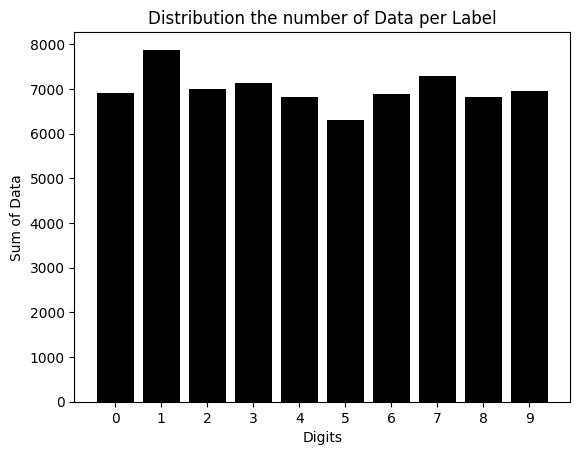

In [56]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label (0-9)
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10), color='black')  # Menambahkan argumen color='black')
plt.xlabel('Digits')
plt.ylabel('Sum of Data')
plt.title('Distribution the number of Data per Label')
plt.show()

Berdasarakan hasil perhitungan dan visualisasi, dapat dilihat bahwa data label dari dataset MNIST terbilang seimbang. Hal ini dapat dilihat dari jumlah dari masing-masing data yang tidak ada perbedaan yang terlalu signifikan.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

In [57]:
# Mengambil data dan label
X, y = mnist.data, mnist.target

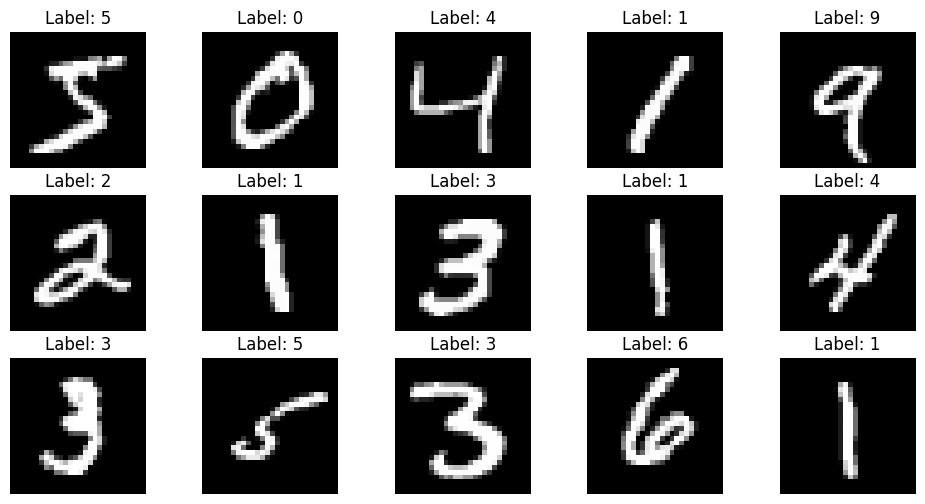

In [58]:
# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [59]:
# Mendefinisikan PCA untuk ekstraksi fitur
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [60]:
# Skala Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM

In [62]:
# Tunning Paramater
def train_model(model,param_grid,X,y):
  grid = GridSearchCV(model, param_grid,n_jobs=-1)
  %time grid.fit(X,y)
  print(grid.best_params_)
  print(grid.best_score_)

  model = grid.best_estimator_
  return model

In [63]:
# Membuat model SVM
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [64]:
# Evaluasi performa model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [65]:
# Visualisasi hasil prediksi model
def show_prediction(X,y,pred):

  # Inisialisasi label yang benar (ground truth) dan label prediksi
  true_labels = y
  predicted_labels = pred

  # Menampilkan citra dari data testing dengan label benar dan label prediksi
  plt.figure(figsize=(12, 6))
  for i in range(30):
      plt.subplot(6, 5, i + 1)
      plt.imshow(X[i].reshape(28, 28), cmap="gray")

      # Tentukan warna teks berdasarkan benar atau salah
      if true_labels[i] == predicted_labels[i]:
          text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
      else:
          text_color = 'red'  # Jika prediksi salah, teks berwarna merah

      plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
      plt.axis("off")
  plt.tight_layout()
  plt.show()

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.!

Rasio 70:30

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [67]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 7:3")

CPU times: user 51.7 s, sys: 3.57 s, total: 55.2 s
Wall time: 4min 41s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9850612244897959
SVM | scaled | PCA | 7:3 Accuracy: 0.9854285714285714 = 98.54%
SVM | scaled | PCA | 7:3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.99      0.99      0.99      2364
           2       0.98      0.99      0.98      2133
           3       0.99      0.98      0.98      2176
           4       0.98      0.98      0.98      1936
           5       0.99      0.98      0.99      1915
           6       0.99      0.99      0.99      2088
           7       0.98      0.99      0.98      2248
           8       0.99      0.98      0.98      1992
           9       0.98      0.97      0.98      2090

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99   

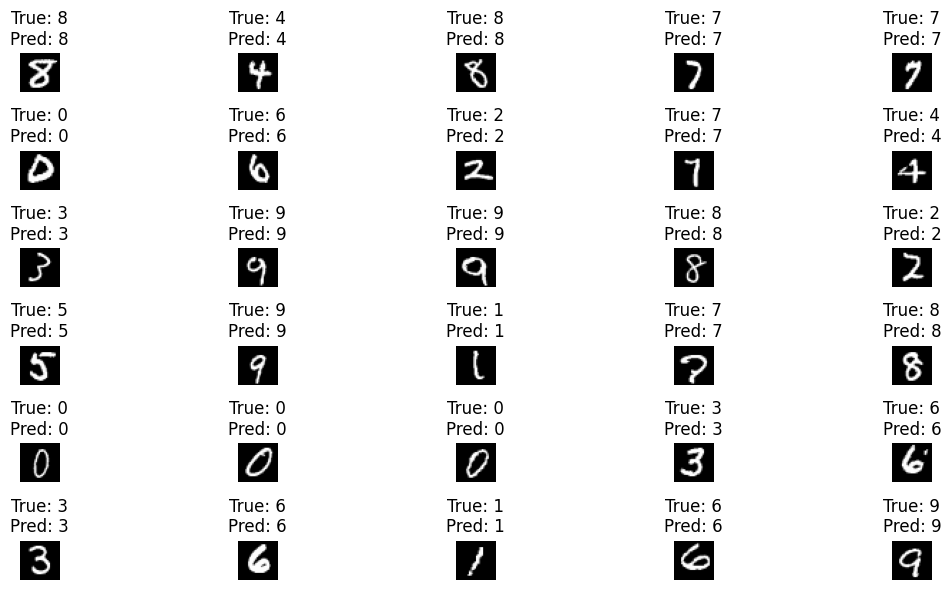

In [68]:
show_prediction(X_test,y_test,y_pred)

Rasio 80:20

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 8:2")

CPU times: user 1min 4s, sys: 2.99 s, total: 1min 7s
Wall time: 5min 46s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9860714285714286
SVM | scaled | PCA | 8:2 Accuracy: 0.9857857142857143 = 98.58%
SVM | scaled | PCA | 8:2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.98      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99 

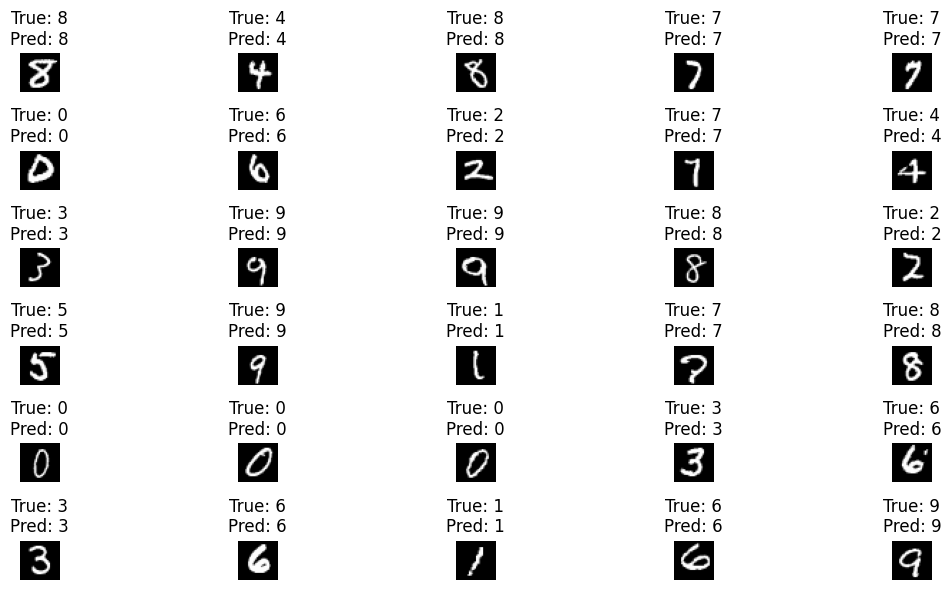

In [71]:
show_prediction(X_test,y_test,y_pred)

Rasio 90:10

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [76]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 9:1")

CPU times: user 1min 48s, sys: 3.86 s, total: 1min 52s
Wall time: 8min 4s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9868095238095238
SVM | scaled | PCA | 9:1 Accuracy: 0.9864285714285714 = 98.64%
SVM | scaled | PCA | 9:1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       0.99      0.99      0.99       800
           2       0.97      0.99      0.98       674
           3       0.98      0.98      0.98       760
           4       0.98      0.99      0.98       611
           5       0.99      0.99      0.99       658
           6       0.99      0.99      0.99       677
           7       0.99      0.99      0.99       724
           8       0.98      0.98      0.98       693
           9       0.98      0.97      0.98       720

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99

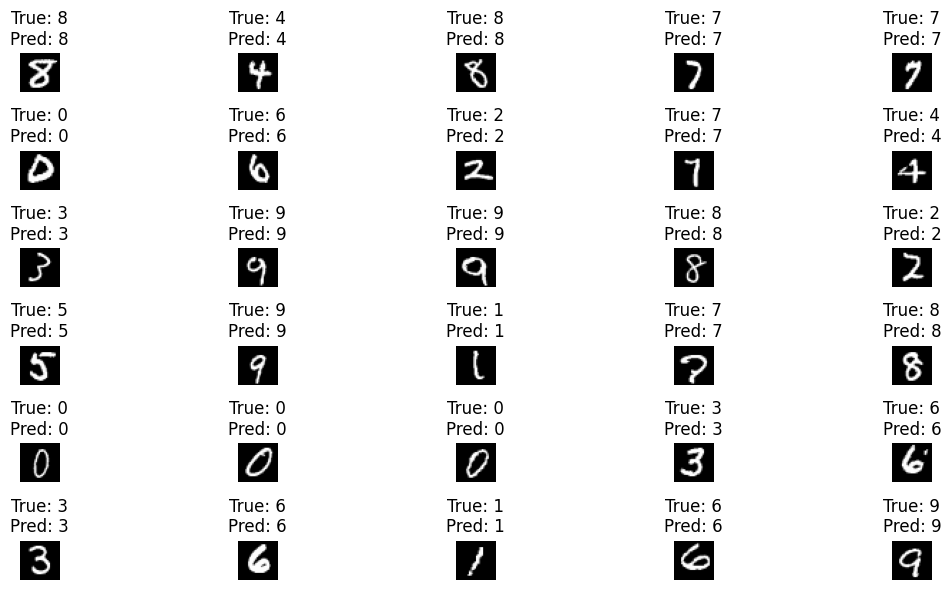

In [77]:
show_prediction(X_test,y_test,y_pred)

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan

Konfigurasi Model:

  - Model yang di gunakan adalah SVM, data fitur di scalling dengan Min-Max Scalling, ekstraksi fitur menggunakan 50 komponen utama.

Parameter:

  - Parameter c untuk SVM diatur ke 5, parameter gamma diatur ke 0.05

Tingkat Akurasi:

  - Rasio 70:30

    - Akurasi 98.54%

  - Rasio 80:20

    - Akurasi 98.58%

  - Rasio 90:10

    - Akurasi 98.64%

___________________________________________________________________________________________________________________________

## SVM Linear Kernel Non Hyper Parameter Tunning

## _Answers_

## Import liblary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

## Mengunduh Dataset

In [ ]:
# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Mengambil Data dan Target

In [ ]:
# Mengambil data dan target dari dataset MNIST
X = mnist['data'].to_numpy()
y = mnist['target'].astype(int)

## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Membuat objek standarisasi
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Pembagian 70: 30

## Membagi Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Bagi data menjadi 70% data pelatihan dan 30% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## PCA

In [ ]:
from sklearn.decomposition import PCA

# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

## Membuat Model SVM Kernel Linear

In [ ]:

# Membuat model SVM
from sklearn.svm import SVC

In [ ]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

## Melatih Model

In [ ]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

## Prediksi

In [ ]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

## Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Evaluasi performa model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")


In [ ]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 7:3")

SVM | scaled | linear | 7:3 Accuracy: 0.8381904761904762 = 83.82%
SVM | scaled | linear | 7:3 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2012
           1       0.93      0.97      0.95      2431
           2       0.84      0.84      0.84      2084
           3       0.82      0.81      0.81      2107
           4       0.79      0.79      0.79      2060
           5       0.78      0.75      0.77      1945
           6       0.89      0.92      0.91      2017
           7       0.87      0.88      0.87      2131
           8       0.84      0.76      0.80      2116
           9       0.73      0.73      0.73      2097

    accuracy                           0.84     21000
   macro avg       0.84      0.84      0.84     21000
weighted avg       0.84      0.84      0.84     21000

SVM | scaled | linear | 7:3 Confusion Matrix:
[[1824    4   18   16    8   83   34    2   20    3]
 [   0 2352   13   15    

## Visualisasi

In [ ]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

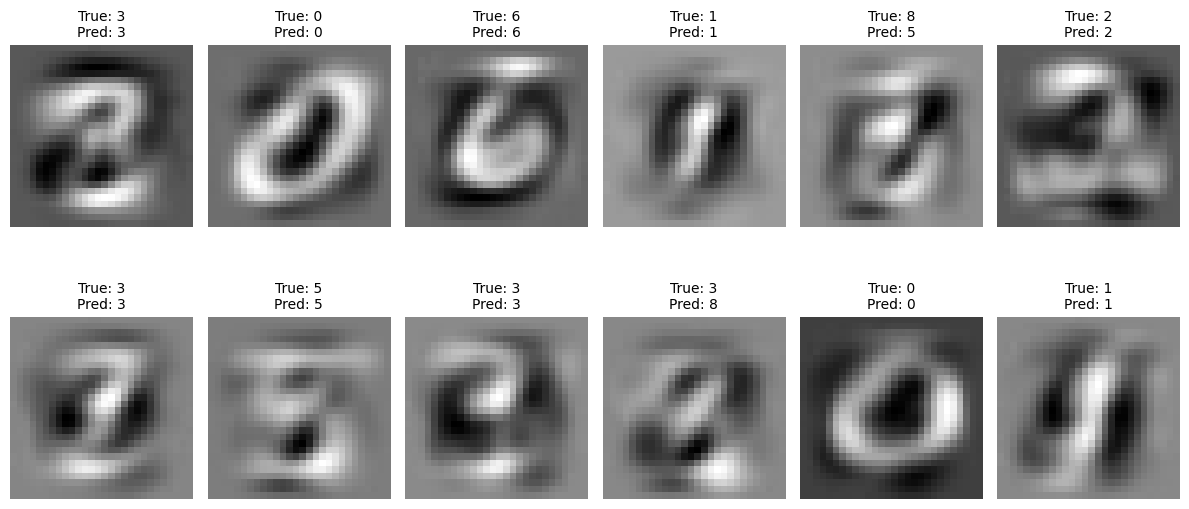

In [ ]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Pembagian 80:20

In [ ]:
# Bagi data menjadi 80% data pelatihan dan 20% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [ ]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

In [ ]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

In [ ]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

In [ ]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 8:2")

SVM | scaled | linear | 8:2 Accuracy: 0.8455 = 84.55%
SVM | scaled | linear | 8:2 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1371
           1       0.91      0.97      0.94      1584
           2       0.87      0.86      0.86      1374
           3       0.83      0.83      0.83      1450
           4       0.80      0.80      0.80      1336
           5       0.79      0.78      0.78      1270
           6       0.91      0.91      0.91      1366
           7       0.89      0.86      0.87      1536
           8       0.83      0.77      0.80      1370
           9       0.72      0.76      0.74      1343

    accuracy                           0.85     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.85      0.85      0.85     14000

SVM | scaled | linear | 8:2 Confusion Matrix:
[[1242    2   12   12    3   67   19    0   13    1]
 [   0 1533    7   14    0    5    5 

In [ ]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

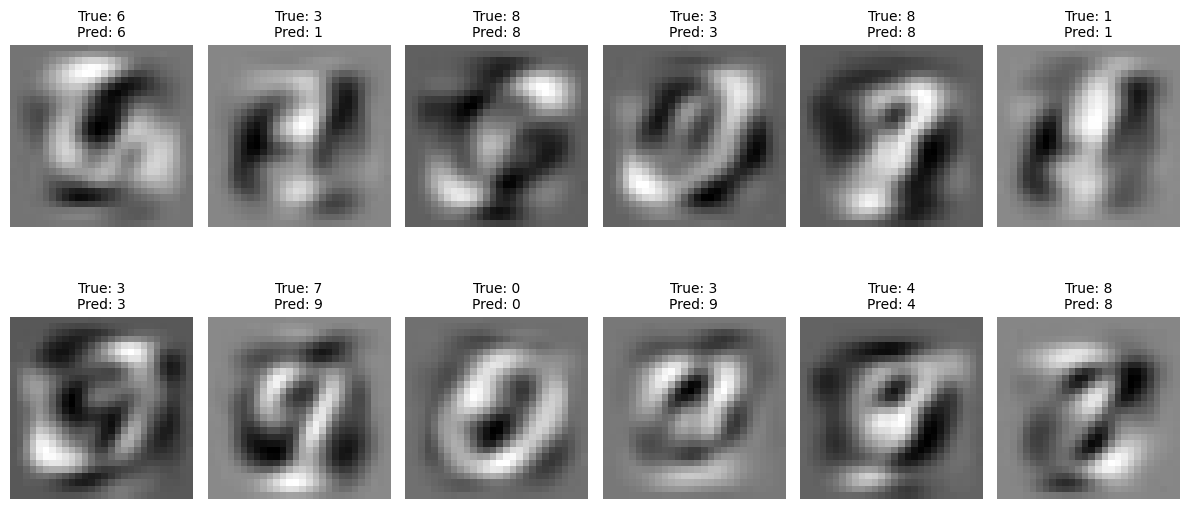

In [ ]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Pembagian 90:10

In [ ]:
# Bagi data menjadi 80% data pelatihan dan 20% data pengujian

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# Membuat objek PCA
pca = PCA(n_components=10)

# Fit the PCA object to the training data
pca.fit(X_train)

# Melakukan transformasi PCA pada data pelatihan dan pengujian
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [ ]:
# Membuat model SVM dengan kernel linear
linear = SVC(kernel='linear', C=5)

In [ ]:
# Melatih model SVM pada data pelatihan yang telah ditransformasi
linear.fit(X_train_transformed, y_train)

SVC(C=5, kernel='linear')

In [ ]:
# Melakukan prediksi pada data pengujian yang telah ditransformasi
y_pred = linear.predict(X_test_transformed)

In [ ]:
evaluate_model(y_test,y_pred,"SVM | scaled | linear | 9:1")

SVM | scaled | linear | 9:1 Accuracy: 0.8377142857142857 = 83.77%
SVM | scaled | linear | 9:1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       705
           1       0.93      0.96      0.94       776
           2       0.83      0.87      0.85       694
           3       0.81      0.82      0.82       718
           4       0.78      0.81      0.79       694
           5       0.76      0.76      0.76       639
           6       0.91      0.91      0.91       696
           7       0.87      0.87      0.87       693
           8       0.84      0.76      0.80       692
           9       0.74      0.72      0.73       693

    accuracy                           0.84      7000
   macro avg       0.84      0.84      0.84      7000
weighted avg       0.84      0.84      0.84      7000

SVM | scaled | linear | 9:1 Confusion Matrix:
[[622   1   9  13   4  41   6   1   5   3]
 [  0 747  10   7   1   2   2   2  

In [ ]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test_transformed[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test_transformed)
y_true_samples = y_test[:n_samples_to_display]
y_pred_samples = y_pred[:n_samples_to_display]

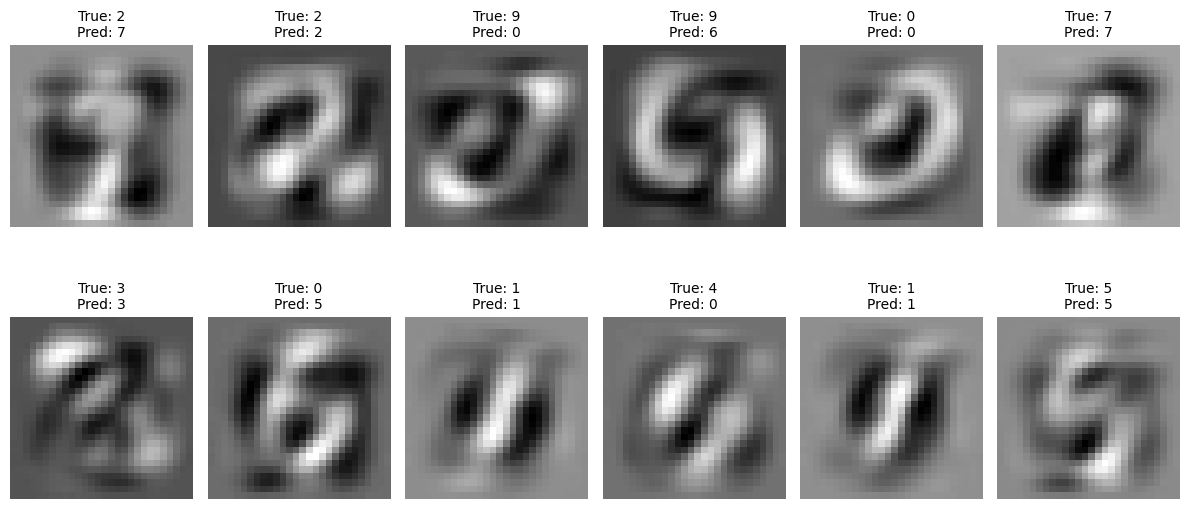

In [ ]:
# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples.values[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

___________________________________________________________________________________________________________________________

## 2. Naive Bayes

**Naive Bayes** adalah sebuah algoritma klasifikasi yang didasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur yang digunakan dalam klasifikasi adalah saling independen dan memiliki pengaruh yang sama terhadap kelas yang diinginkan.

## 2.1 Gaussian Naive Bayes dengan PCA

## _Answers_

## Nomor 1: Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


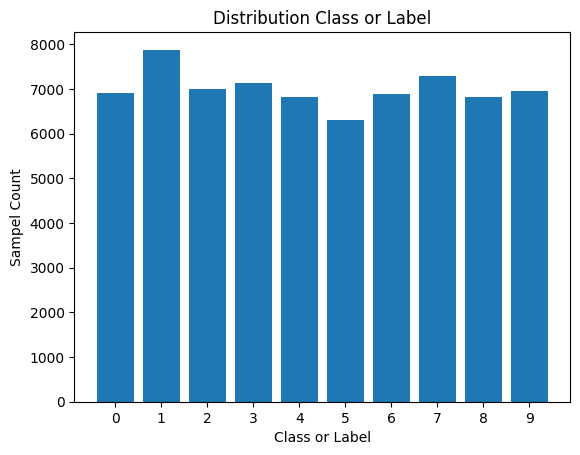

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class or Label')
plt.ylabel('Sampel Count')
plt.title('Distribution Class or Label')
plt.xticks(unique_labels)
plt.show()

### Jumlah data untuk tiap label

In [ ]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


## Nomor 2: Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

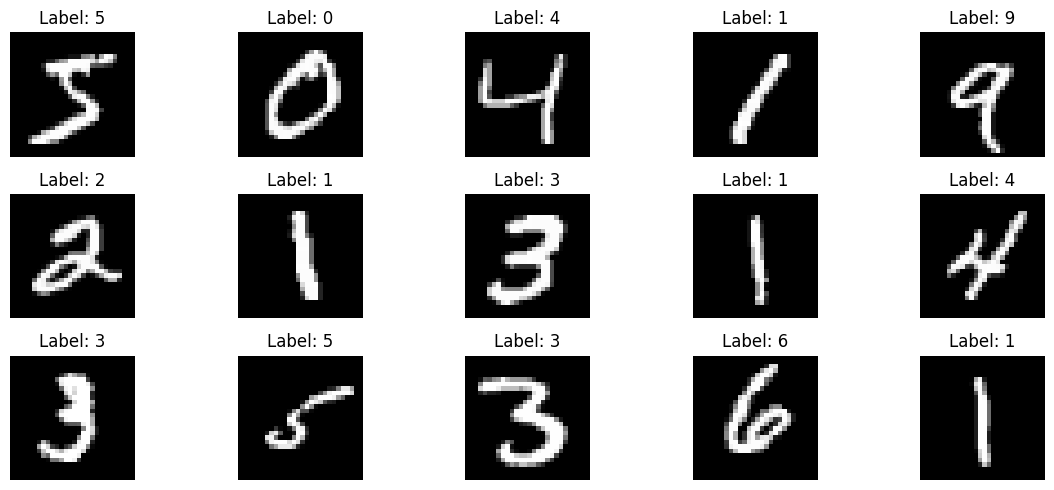

In [ ]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 50  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 50)


## Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

### Rasio 70:30

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))

Data Train Count: 49000
Data Test Count: 21000


### Rasio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train2))
print("Data Test Count:", len(X_test2))

Data Train Count: 56000
Data Test Count: 14000


### Rasio 90:10

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train3))
print("Data Test Count:", len(X_test3))


Data Train Count: 63000
Data Test Count: 7000


## Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

### Gaussian Naive Bayes

#### Rasio 70:30

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)


Accuracy Naive Bayes: 0.8701904761904762


#### Rasio 80:20

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred_nb2 = nb_model.predict(X_test2)

# Mengukur akurasi model Naive Bayes
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Accuracy Naive Bayes:", accuracy_nb2)


Accuracy Naive Bayes: 0.8717857142857143


#### Rasio 90:10

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred_nb3 = nb_model.predict(X_test3)

# Mengukur akurasi model Naive Bayes
accuracy_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Accuracy Naive Bayes:", accuracy_nb3)


Accuracy Naive Bayes: 0.8681428571428571


#### Accuracy, Classification, Confusion Matrix: Data Training

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes terhadap data pelatihan dengan akurasi terbesar
y_train_pred_nb = nb_model.predict(X_train2)
accuracy_train_nb = accuracy_score(y_train2, y_train_pred_nb)
print("Accuracy Naive Bayes (Training):", accuracy_train_nb)

# Classification report Naive Bayes untuk data pelatihan
print("Classification Report Naive Bayes (Training):\n", classification_report(y_train2, y_train_pred_nb))

# Confusion matrix Naive Bayes untuk data pelatihan
confusion_matrix_nb_train = confusion_matrix(y_train2, y_train_pred_nb)
print("Confusion Matrix Naive Bayes (Training):\n", confusion_matrix_nb_train)


Accuracy Naive Bayes (Training): 0.8716607142857142
Classification Report Naive Bayes (Training):
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      5560
           1       0.96      0.94      0.95      6277
           2       0.83      0.86      0.84      5610
           3       0.84      0.83      0.84      5708
           4       0.86      0.86      0.86      5529
           5       0.77      0.84      0.80      5040
           6       0.92      0.92      0.92      5480
           7       0.92      0.86      0.89      5790
           8       0.83      0.84      0.84      5468
           9       0.82      0.83      0.83      5538

    accuracy                           0.87     56000
   macro avg       0.87      0.87      0.87     56000
weighted avg       0.87      0.87      0.87     56000

Confusion Matrix Naive Bayes (Training):
 [[5189    0   50   56    5  155   83    6    9    7]
 [   0 5874  120   28    9   96   28   30   78 

#### Accuracy, Classification, Confusion Matrix: Data Testing

In [ ]:
# Evaluasi model Naive Bayes terhadap data pengujian
y_test_pred_nb = nb_model.predict(X_test2)
accuracy_test_nb = accuracy_score(y_test2, y_test_pred_nb)
print("\nAccuracy Naive Bayes (Testing):", accuracy_test_nb)

# Classification report Naive Bayes untuk data pengujian
print("Classification Report Naive Bayes (Testing):\n", classification_report(y_test2, y_test_pred_nb))

# Confusion matrix Naive Bayes untuk data pengujian
confusion_matrix_nb_test = confusion_matrix(y_test2, y_test_pred_nb)
print("Confusion Matrix Naive Bayes (Testing):\n", confusion_matrix_nb_test)



Accuracy Naive Bayes (Testing): 0.8717857142857143
Classification Report Naive Bayes (Testing):
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1343
           1       0.95      0.94      0.95      1600
           2       0.83      0.85      0.84      1380
           3       0.84      0.83      0.83      1433
           4       0.84      0.85      0.84      1295
           5       0.77      0.84      0.80      1273
           6       0.92      0.92      0.92      1396
           7       0.92      0.87      0.89      1503
           8       0.84      0.84      0.84      1357
           9       0.84      0.83      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Confusion Matrix Naive Bayes (Testing):
 [[1255    0    7    5    4   39   23    4    5    1]
 [   0 1511   23   11    1   20    4    9   19   

## Nomor 6: Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

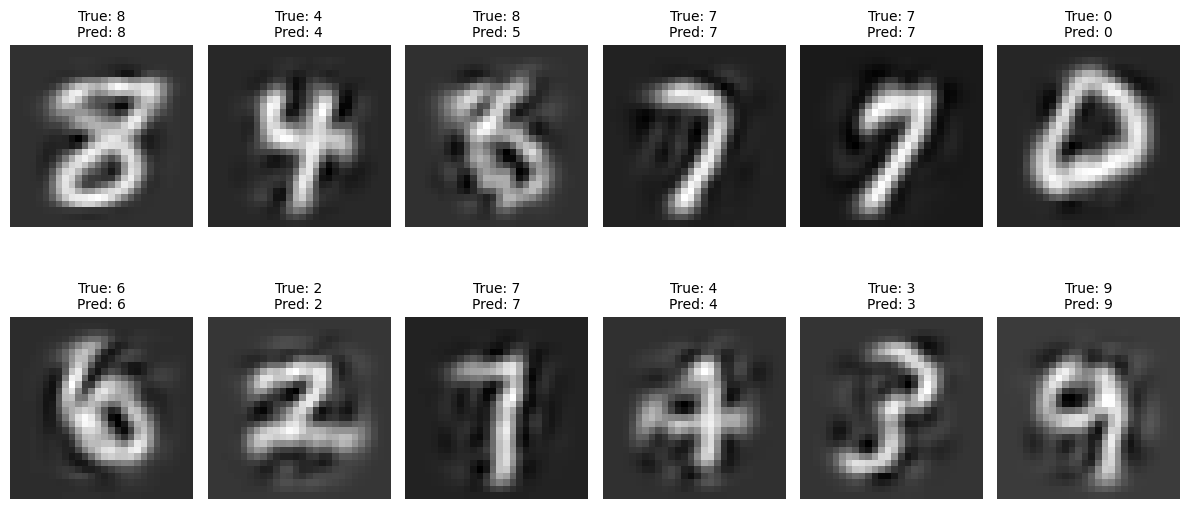

In [ ]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test2)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

___________________________________________________________________________________________________________________________

## 2.2 Multinomial Naive Bayes dengan PCA

## _Answers_

## Nomor 1: Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


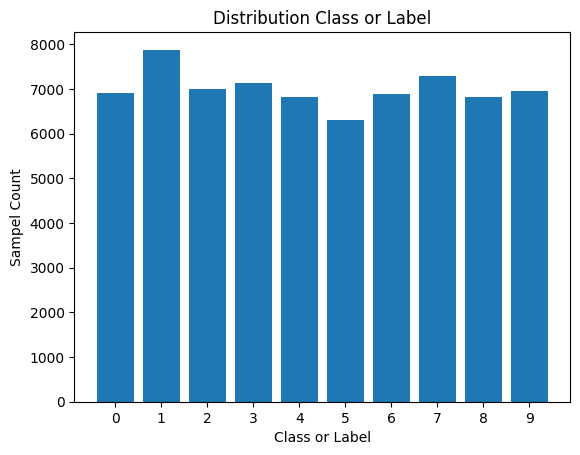

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Class or Label')
plt.ylabel('Sampel Count')
plt.title('Distribution Class or Label')
plt.xticks(unique_labels)
plt.show()

### Jumlah data untuk tiap label

In [ ]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


## Nomor 2: Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

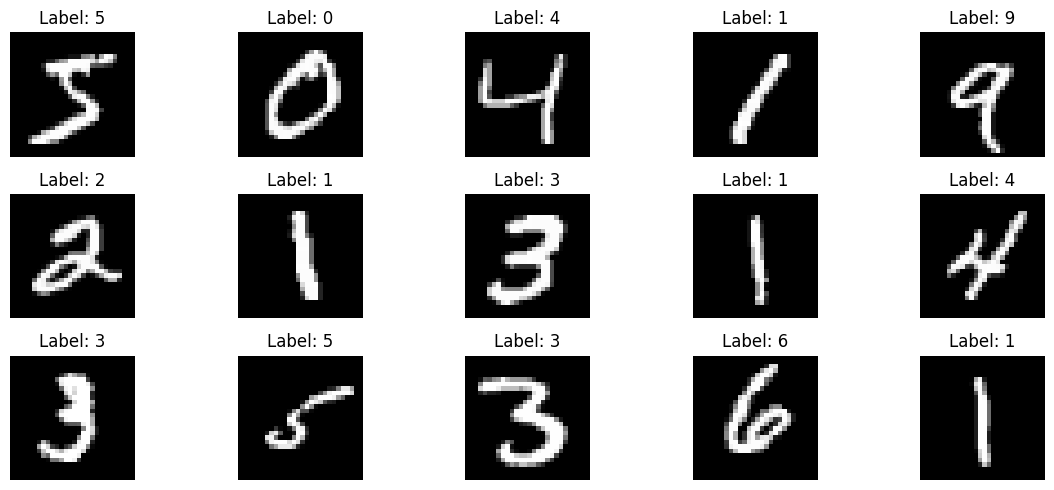

In [ ]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [ ]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 50  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 50)


## Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

### Rasio 70:30

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train1))
print("Data Test Count:", len(X_test1))

Data Train Count: 49000
Data Test Count: 21000


### Rasio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train2))
print("Data Test Count:", len(X_test2))

Data Train Count: 56000
Data Test Count: 14000


### Rasio 90:10

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train3))
print("Data Test Count:", len(X_test3))


Data Train Count: 63000
Data Test Count: 7000


## Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

### Naive Bayes

#### Rasio 70:30

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred_nb1 = nb_model.predict(X_test1)

# Mengukur akurasi model Naive Bayes
accuracy_nb1 = accuracy_score(y_test1, y_pred_nb1)
print("Accuracy Naive Bayes:", accuracy_nb1)


Accuracy Naive Bayes: 0.87


#### Rasio 80:20

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred_nb2 = nb_model.predict(X_test2)

# Mengukur akurasi model Naive Bayes
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
print("Accuracy Naive Bayes:", accuracy_nb2)


Accuracy Naive Bayes: 0.8714285714285714


#### Rasio 90:10

In [ ]:
# Melatih model Naive Bayes menggunakan data pelatihan
nb_model.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred_nb3 = nb_model.predict(X_test3)

# Mengukur akurasi model Naive Bayes
accuracy_nb3 = accuracy_score(y_test3, y_pred_nb3)
print("Accuracy Naive Bayes:", accuracy_nb3)


Accuracy Naive Bayes: 0.868


### Accuracy, Classification, Confusion Matrix: Data Training

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes terhadap data pelatihan
y_train_pred_nb1 = nb_model.predict(X_train1)
accuracy_train_nb1 = accuracy_score(y_train1, y_train_pred_nb1)
print("Accuracy Naive Bayes (Training):", accuracy_train_nb1)

# Classification report Naive Bayes untuk data pelatihan
print("Classification Report Naive Bayes (Training):\n", classification_report(y_train1, y_train_pred_nb1))

# Confusion matrix Naive Bayes untuk data pelatihan
confusion_matrix_nb_train1 = confusion_matrix(y_train1, y_train_pred_nb1)
print("Confusion Matrix Naive Bayes (Training):\n", confusion_matrix_nb_train1)


Accuracy Naive Bayes (Training): 0.8722040816326531
Classification Report Naive Bayes (Training):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4845
           1       0.96      0.93      0.95      5513
           2       0.83      0.86      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.76      0.85      0.80      4398
           6       0.93      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.83      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Confusion Matrix Naive Bayes (Training):
 [[4532    0   41   48    3  130   68    7   10    6]
 [   0 5143  106   25    8   85   30   27   75 

### Accuracy, Classification, Confusion Matrix: Data Testing

In [ ]:
# Evaluasi model Naive Bayes terhadap data pengujian
y_test_pred_nb1 = nb_model.predict(X_test1)
accuracy_test_nb1 = accuracy_score(y_test1, y_test_pred_nb1)
print("\nAccuracy Naive Bayes (Testing):", accuracy_test_nb1)

# Classification report Naive Bayes untuk data pengujian
print("Classification Report Naive Bayes (Testing):\n", classification_report(y_test1, y_test_pred_nb1))

# Confusion matrix Naive Bayes untuk data pengujian
confusion_matrix_nb_test1 = confusion_matrix(y_test1, y_test_pred_nb1)
print("Confusion Matrix Naive Bayes (Testing):\n", confusion_matrix_nb_test1)



Accuracy Naive Bayes (Testing): 0.8706666666666667
Classification Report Naive Bayes (Testing):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2058
           1       0.95      0.95      0.95      2364
           2       0.83      0.85      0.84      2133
           3       0.84      0.83      0.83      2176
           4       0.85      0.85      0.85      1936
           5       0.76      0.83      0.80      1915
           6       0.92      0.92      0.92      2088
           7       0.92      0.87      0.89      2248
           8       0.84      0.83      0.83      1992
           9       0.83      0.84      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000

Confusion Matrix Naive Bayes (Testing):
 [[1914    0   15   12    4   67   34    5    5    2]
 [   1 2235   38   13    2   31    4   11   27   

## Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

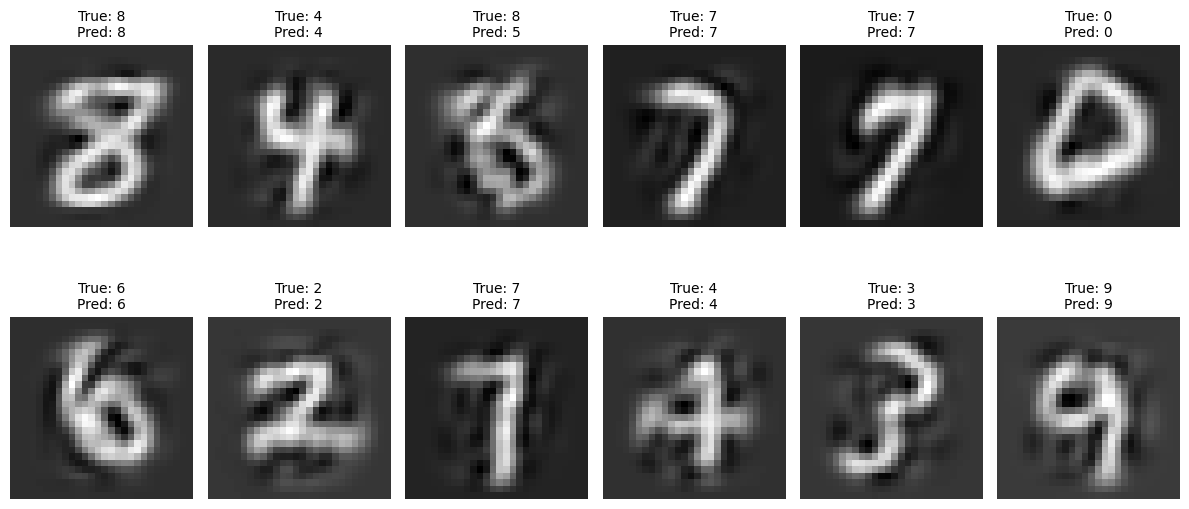

In [ ]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 12

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test1[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test1)
y_true_samples = y_test1[:n_samples_to_display]
y_pred_samples = y_test_pred_nb1[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 6, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes Multinomial

# Multinomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = mnist.data
y = mnist.target

## Klasifikasi Naive Bayes Multinomial

### Rasio 70:30

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Menyusun pipeline dengan skala dan model Logistic Regression
scaler = MinMaxScaler()
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Menyusun pipeline dengan skala dan model Logistic Regression
pipeline = Pipeline([('scaler', scaler), ('model', model)])

# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train1, y_train1)

# Menguji model pada data pengujian
y_pred1 = pipeline.predict(X_test1)

# Menghitung akurasi
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Akurasi Model:", accuracy1)

Akurasi Model: 0.9034285714285715


### Rasio 80:20

In [ ]:
# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train2, y_train2)

# Menguji model pada data pengujian
y_pred2 = pipeline.predict(X_test2)

# Menghitung akurasi
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Akurasi Model:", accuracy2)

Akurasi Model: 0.9042142857142857


### Rasio 90:10

In [ ]:
# Melatih model Logistic Regression dengan data yang telah di-scala
pipeline.fit(X_train3, y_train3)

# Menguji model pada data pengujian
y_pred3 = pipeline.predict(X_test3)

# Menghitung akurasi
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Akurasi Model:", accuracy3)

Akurasi Model: 0.9037142857142857


## Accuracy, Classification, Confusion Matrix: Data Training, dengan akurasi rasio tertinggi

In [ ]:
from sklearn.metrics import confusion_matrix

# Menguji model pada data training
y_train_pred2 = model.predict(X_train2)

# Menghitung akurasi pada data training
accuracy_train2 = accuracy_score(y_train2, y_train_pred2)
print("Akurasi Data Training:", accuracy_train2)

# Menampilkan laporan klasifikasi untuk data training
print("Laporan Klasifikasi Data Training:")
print(classification_report(y_train2, y_train_pred2))

# Menghitung dan menampilkan confusion matrix untuk data pengujian
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)
# Pada bagian ini, kita melakukan prediksi pada data training dan menghitung akurasi pada data training. Selanjutnya, kita menampilkan laporan klasifikasi untuk data training. Kemudian, kita menghitung dan menampilkan confusion matrix untuk data pengujian. Confusion matrix akan menunjukkan hasil prediksi yang benar dan salah untuk setiap kelas pada data pengujian.

Akurasi Data Training: 0.8160178571428571
Laporan Klasifikasi Data Training:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      5560
           1       0.64      0.99      0.78      6277
           2       0.94      0.73      0.82      5610
           3       0.87      0.81      0.84      5708
           4       0.78      0.93      0.85      5529
           5       0.92      0.60      0.73      5040
           6       0.86      0.93      0.90      5480
           7       0.80      0.92      0.85      5790
           8       0.96      0.57      0.72      5468
           9       0.89      0.64      0.75      5538

    accuracy                           0.82     56000
   macro avg       0.85      0.81      0.81     56000
weighted avg       0.84      0.82      0.81     56000

Confusion Matrix:
[[1296    1    5    3    1   11   14    3    8    1]
 [   0 1541    4   11    1   11    1    6   21    4]
 [   5   21 1208   18   22    8   27   2

## Accuracy, Classification, Confusion Matrix: Data Testing, dengan akurasi rasio tertinggi

In [ ]:
# Menguji model pada data pengujian
y_test_pred2 = model.predict(X_test2)

# Menghitung akurasi pada data pengujian
accuracy_test2 = accuracy_score(y_test2, y_test_pred2)
print("Akurasi Data Testing:", accuracy_test2)

# Menampilkan laporan klasifikasi untuk data pengujian
print("Laporan Klasifikasi Data Testing:")
print(classification_report(y_test2, y_test_pred2))

# Menghitung dan menampilkan confusion matrix untuk data pengujian
conf_matrix_test2 = confusion_matrix(y_test2, y_test_pred2)
print("Confusion Matrix Data Testing:")
print(conf_matrix_test2)

Akurasi Data Testing: 0.8211428571428572
Laporan Klasifikasi Data Testing:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1343
           1       0.65      0.99      0.79      1600
           2       0.95      0.74      0.83      1380
           3       0.87      0.81      0.84      1433
           4       0.78      0.93      0.85      1295
           5       0.93      0.61      0.73      1273
           6       0.86      0.93      0.89      1396
           7       0.81      0.94      0.87      1503
           8       0.96      0.58      0.73      1357
           9       0.91      0.66      0.76      1420

    accuracy                           0.82     14000
   macro avg       0.85      0.82      0.82     14000
weighted avg       0.85      0.82      0.82     14000

Confusion Matrix Data Testing:
[[1318    1    0    2    2    1   16    2    1    0]
 [   0 1582    3    5    2    1    0    5    1    1]
 [  63  138 1023   16   32   

Tampilkan citra data testing berserta hasil pelabelannya

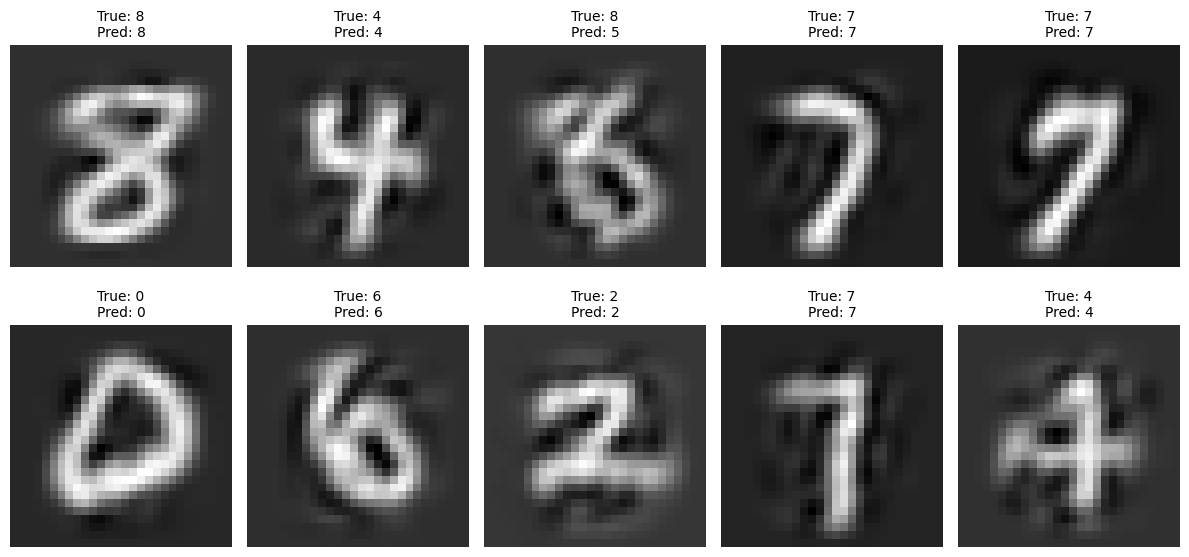

In [ ]:
import matplotlib.pyplot as plt

# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 10

# Mengambil sampel data pengujian dan hasil prediksinya
X_samples = X_test2[:n_samples_to_display]
x_restored = pca.inverse_transform(X_test2)
y_true_samples = y_test2[:n_samples_to_display]
y_pred_samples = y_test_pred2[:n_samples_to_display]

# Menampilkan citra berserta hasil prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_restored[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true_samples[i]}\nPred: {y_pred_samples[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

___________________________________________________________________________________________________________________________

## 2.3 Gaussian Naive Bayes dengan Histogram

## _Answers_

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))


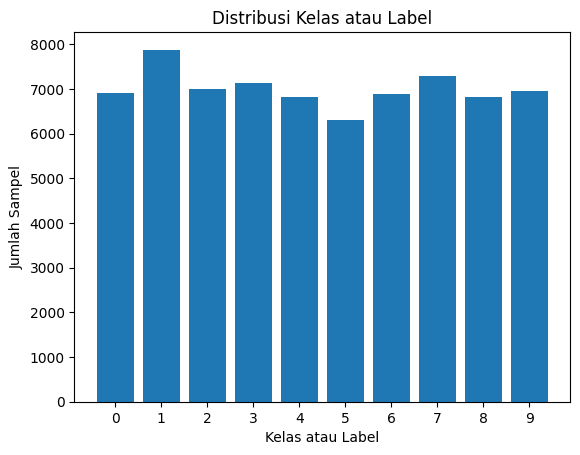

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

label_counts = np.unique(mnist.target, return_counts=True)

# Menampilkan jumlah data dari setiap label
print(label_counts)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Kelas atau Label')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas atau Label')
plt.xticks(unique_labels)
plt.show()

In [ ]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


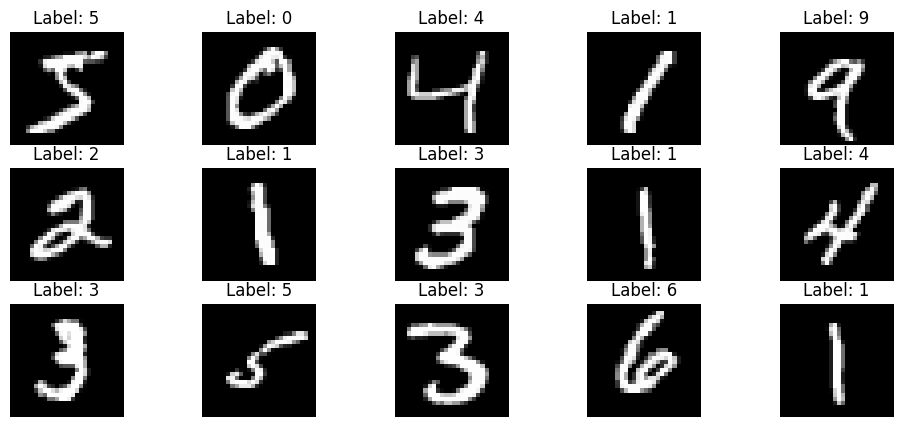

In [ ]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()

# Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

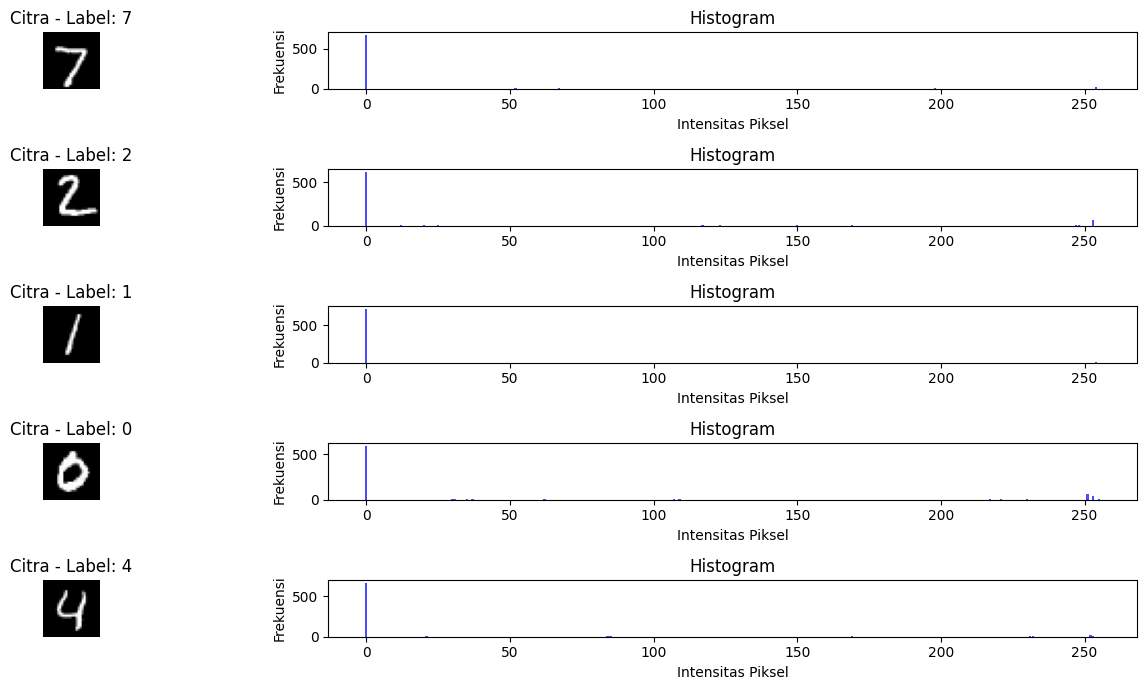

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
# Memuat data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Menampilkan citra dan histogram dari data pengujian
num_images_to_display = 5

# 1. Ekstraksi Fitur (Histogram)
def extract_histogram_features(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    return histogram

# Fungsi untuk menampilkan citra dan histogram
def display_images_with_histograms(images, histograms, labels, num_images):
    plt.figure(figsize=(15, 7))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Citra - Label: {labels[i]}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2*i + 2)
        plt.bar(range(256), histograms[i], color='blue', alpha=0.7)
        plt.title("Histogram")
        plt.xlabel("Intensitas Piksel")
        plt.ylabel("Frekuensi")

    plt.tight_layout()
    plt.show()

# Ekstraksi fitur dan histogram untuk setiap data gambar
X_train_histograms = np.array([extract_histogram_features(image) for image in X_train])
X_test_histograms = np.array([extract_histogram_features(image) for image in X_test])

# Menampilkan citra dan histogram dari data pengujian
display_images_with_histograms(X_test[:num_images_to_display], X_test_histograms[:num_images_to_display], y_test[:num_images_to_display], num_images_to_display)


# Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

Rasio 70:30

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_70))
print("Data Test Count:", len(X_test_70))

Data Train Count: 42000
Data Test Count: 18000


Rasio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_80))
print("Data Test Count:", len(X_test_80))

Data Train Count: 48000
Data Test Count: 12000


Rasio 90:10

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_90))
print("Data Test Count:", len(X_test_90))

Data Train Count: 42000
Data Test Count: 18000


# Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

Naive Bayes -> Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Gaussian Naive Bayes
model = GaussianNB()

# Melakukan flattening pada data gambar (2D)
X_train_70_flat = X_train_70.reshape((X_train_70.shape[0], -1))
X_test_70_flat = X_test_70.reshape((X_test_70.shape[0], -1))

# Latih model dengan rasio 70:30
model.fit(X_train_70_flat, y_train_70)

# Klasifikasi untuk rasio 70:30
y_pred_70 = model.predict(X_test_70_flat)
accuracy_70 = accuracy_score(y_test_70, y_pred_70)
print("Akurasi Model (70:30): {:.2f}%".format(accuracy_70 * 100))

# rasio 80:20

# Melakukan flattening pada data gambar (2D)
X_train_80_flat = X_train_80.reshape((X_train_80.shape[0], -1))
X_test_80_flat = X_test_80.reshape((X_test_80.shape[0], -1))

# Latih model dengan rasio 80:20
model.fit(X_train_80_flat, y_train_80)

# Klasifikasi untuk rasio 80:20
y_pred_80 = model.predict(X_test_80_flat)
accuracy_80 = accuracy_score(y_test_80, y_pred_80)
print("Akurasi Model (80:20): {:.2f}%".format(accuracy_80 * 100))

# rasio 90:10

# Melakukan flattening pada data gambar (2D)
X_train_90_flat = X_train_90.reshape((X_train_90.shape[0], -1))
X_test_90_flat = X_test_90.reshape((X_test_90.shape[0], -1))

# Latih model dengan rasio 90:10
model.fit(X_train_90_flat, y_train_90)

# Klasifikasi untuk rasio 90:10
y_pred_90 = model.predict(X_test_90_flat)
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Akurasi Model (90:10): {:.2f}%".format(accuracy_90 * 100))


Akurasi Model (70:30): 56.38%
Akurasi Model (80:20): 56.01%
Akurasi Model (90:10): 56.38%


# Accuracy, Classification, Confusion Matrix: Data Training



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========== Rasio 70:30 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_70 = model.predict(X_train_70_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_70 = accuracy_score(y_train_70, y_train_pred_70)
print("Akurasi pada Data Pelatihan (Rasio 70:30):", accuracy_train_70)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_70 = classification_report(y_train_70, y_train_pred_70)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 70:30):\n", classification_report_train_70)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_70 = confusion_matrix(y_train_70, y_train_pred_70)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 70:30):\n\n", confusion_matrix_train_70)

# ========== Rasio 80:20 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_80 = model.predict(X_train_80_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_80 = accuracy_score(y_train_80, y_train_pred_80)
print("Akurasi pada Data Pelatihan (Rasio 80:20):", accuracy_train_80)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_80 = classification_report(y_train_80, y_train_pred_80)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 80:20):\n", classification_report_train_80)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_80 = confusion_matrix(y_train_80, y_train_pred_80)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 80:20):\n\n", confusion_matrix_train_80)

# ========== Rasio 90:10 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_90 = model.predict(X_train_90_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_90 = accuracy_score(y_train_90, y_train_pred_90)
print("Akurasi pada Data Pelatihan (Rasio 90:10):", accuracy_train_90)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_90 = classification_report(y_train_90, y_train_pred_90)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 90:10):\n", classification_report_train_90)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_90 = confusion_matrix(y_train_90, y_train_pred_90)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 90:10):\n", confusion_matrix_train_90)


Akurasi pada Data Pelatihan (Rasio 70:30): 0.5663571428571429
Laporan Klasifikasi pada Data Pelatihan (Rasio 70:30):
               precision    recall  f1-score   support

           0       0.78      0.87      0.83      4118
           1       0.78      0.95      0.85      4748
           2       0.88      0.36      0.51      4199
           3       0.78      0.38      0.51      4285
           4       0.85      0.18      0.30      4116
           5       0.71      0.09      0.15      3768
           6       0.65      0.94      0.77      4131
           7       0.92      0.29      0.44      4328
           8       0.29      0.58      0.39      4121
           9       0.36      0.95      0.52      4186

    accuracy                           0.57     42000
   macro avg       0.70      0.56      0.53     42000
weighted avg       0.70      0.57      0.53     42000

Matriks Kebingungan pada Data Pelatihan (Rasio 70:30):

 [[3596    9   25   10   12   11  160    3  189  103]
 [   1 4493  

# Accuracy, Classification, Confusion Matrix: Data Testing


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========== Rasio 70:30 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_30 = model.predict(X_test_70_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_30 = accuracy_score(y_test_70, y_test_pred_30)
print("Akurasi pada Data Pengujian (Rasio 70:30):", accuracy_test_30)

# Laporan Klasifikasi pada data pengujian
classification_report_test_30 = classification_report(y_test_70, y_test_pred_30)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 70:30):\n", classification_report_test_30)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_30 = confusion_matrix(y_test_70, y_test_pred_30)
print("Matriks Kebingungan pada Data Pengujian (Rasio 70:30):\n", confusion_matrix_test_30)

# ========== Rasio 80:20 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_20 = model.predict(X_test_80_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_20 = accuracy_score(y_test_80, y_test_pred_20)
print("Akurasi pada Data Pengujian (Rasio 80:20):", accuracy_test_20)

# Laporan Klasifikasi pada data pengujian
classification_report_test_20 = classification_report(y_test_80, y_test_pred_20)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 80:20):\n", classification_report_test_20)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_20 = confusion_matrix(y_test_80, y_test_pred_20)
print("Matriks Kebingungan pada Data Pengujian (Rasio 80:20):\n", confusion_matrix_test_20)

# ========== Rasio 90:10 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_10 = model.predict(X_test_90_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_10 = accuracy_score(y_test_90, y_test_pred_10)
print("Akurasi pada Data Pengujian (Rasio 90:10):", accuracy_test_10)

# Laporan Klasifikasi pada data pengujian
classification_report_test_10 = classification_report(y_test_90, y_test_pred_10)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 90:10):\n", classification_report_test_10)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_10 = confusion_matrix(y_test_90, y_test_pred_10)
print("Matriks Kebingungan pada Data Pengujian (Rasio 90:10):\n", confusion_matrix_test_10)


Akurasi pada Data Pengujian (Rasio 70:30): 0.5638333333333333
Laporan Klasifikasi pada Data Pengujian (Rasio 70:30):
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1805
           1       0.78      0.94      0.85      1994
           2       0.84      0.36      0.50      1759
           3       0.77      0.39      0.52      1846
           4       0.85      0.20      0.32      1726
           5       0.66      0.08      0.14      1653
           6       0.65      0.94      0.77      1787
           7       0.91      0.28      0.43      1937
           8       0.29      0.58      0.38      1730
           9       0.36      0.96      0.52      1763

    accuracy                           0.56     18000
   macro avg       0.69      0.56      0.53     18000
weighted avg       0.69      0.56      0.53     18000

Matriks Kebingungan pada Data Pengujian (Rasio 70:30):
 [[1561    3   14    2    0    2   81    1   89   52]
 [   2 1869   

# Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

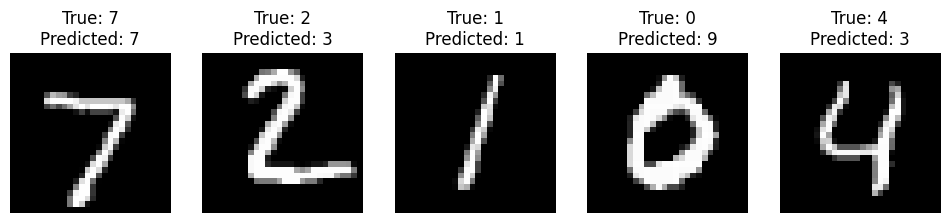

In [ ]:
def display_images_with_predictions(images, true_labels, predicted_labels, num_images):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# Menampilkan citra dari data pengujian dengan prediksi (rasio 80:20)
num_images_to_display = 5
y_pred_test_80 = model.predict(X_test_70_flat)
display_images_with_predictions(X_test[:num_images_to_display], y_test[:num_images_to_display], y_pred_test_80[:num_images_to_display], num_images_to_display)


___________________________________________________________________________________________________________________________

## Kesimpulan

Lima metode digunakan untuk dilakukan prediksi terhadap dataset _mnist_ yang merupakan gambar tulis tangan, dapat disimpulkan bahwa setelah melakukan proses _tuning hyperparameter_ untuk model **SVM dengan kernel RBF**, metode dengan pengujian menggunakan ukuran data uji sebesar 10% (`test_size` 0.1) terbukti menjadi yang terbaik, menghasilkan akurasi sebesar **98.64%** saat diuji. Metode lain yang menghasilakn akurasi tinggi adalah **Multinomial Naive Bayes** dengan _PCA_ dengan data uji atau `test_size` sebesar 0,2 dengan akurasi **90,42%**.

## License

MIT License
